# Perceptron Classification
___
We'll first try to classify drug-target interactions using a simple perceptron classifier. Our features will be the top-4 cell line cpd-kd correlation values.

In [108]:
import numpy as np
from support_classes import Perceptron
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA

In [184]:
training_data = pd.DataFrame.from_csv('checkpoint_files/top_4_correlation_training_data.csv')

# balance the data with the same # of positive and negative training examples
num_true = training_data['label'].value_counts().loc[1]
true_training_data = training_data.iloc[:num_true] # use all the true pairs
false_training_data = training_data.iloc[num_true:].sample(n=num_true) # randomly sample same no. of false pairs
balanced_training_data = pd.concat([true_training_data, false_training_data], ignore_index=True)

# shuffle training data
shuffled_training_data = balanced_training_data.sample(frac=1)
y = shuffled_training_data['label'].astype(float).values
X = shuffled_training_data[shuffled_training_data.columns[3:]].values

The training data looks like this:

In [186]:
shuffled_training_data.head(10)

,pert_id,target,label,A375,A549,MCF7,PC3
93,BRD-K66175015,ERBB4,1,-0.084139,0.133109,0.058393,0.083021
175,BRD-K92241597,ERAP2,1,0.117402,0.227810,0.054412,0.157873
134,BRD-K75295174,AURKA,1,0.169863,0.298288,0.080793,-0.027807
327,BRD-K52075040,PRKCQ,-1,-0.240390,-0.021033,0.385674,0.042898
100,BRD-K43797669,CYP1B1,1,0.053748,-0.023034,0.053542,0.054011
312,BRD-K19295594,CDK5,-1,0.013921,0.138181,0.107552,-0.368160
319,BRD-K56343971,MTOR,-1,0.318261,0.003285,-0.010372,0.075373
157,BRD-K88510285,PSMB8,1,0.068378,0.180998,0.235714,0.038255
309,BRD-K24576554,PDPK1,-1,-0.076957,0.324358,0.030326,0.298517
268,BRD-K59369769,XPNPEP1,-1,0.174066,0.202037,0.170392,-0.046054


Now lets train our simple perceptron model on this data:

In [181]:
p = Perceptron(n_iter=10000, random_state=2)
p.fit(X,y)

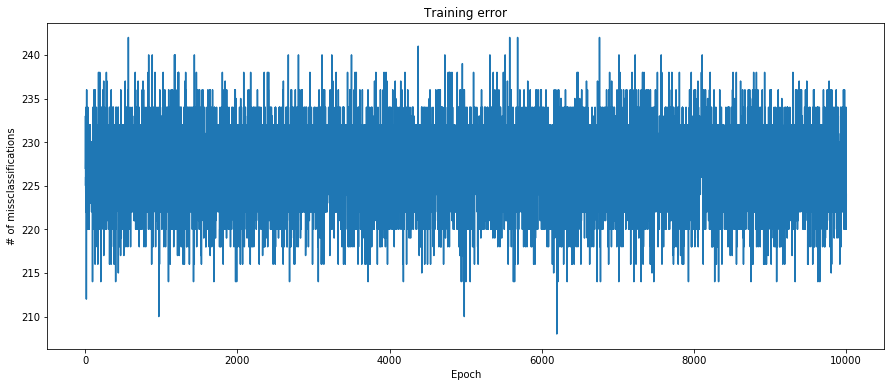

In [187]:
f, ax = plt.subplots(figsize=(15, 6))
plt.plot(range(1, len(p.errors_) + 1),
         p.errors_
        )
plt.title('Training error')
plt.ylabel('# of missclassifications')
plt.xlabel('Epoch')
plt.show()

So we can see that our model does not do very well. We would expect random label assignment to get about half the examples correct (n=244). Our classifier *barely* does better than random:

In [188]:
np.mean(p.errors_)

226.98750000000001

Perhaps this is not surprising, given the complexity of our data and the simplicity of the model. For one, linear classifiers expect the features to be independent, which in our case is not true. The perceptron will also only converge if the samples are linearly separable if the two classes are linearly separable. This is most likely not the case for our data. Let's do PCA on our dataset to try to get a better feel for it:

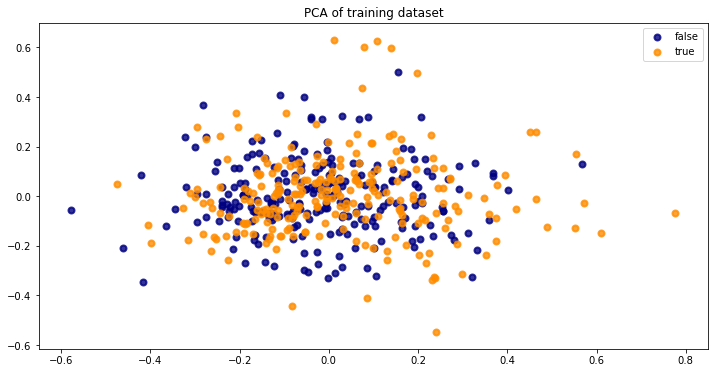

In [189]:
# Let's perform PCA to get a feel for this data
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

plt.figure(figsize=(12, 6))
colors = ['navy', 'darkorange']
labels = [-1.,1.]
label_names = ['false', 'true']
lw = 2

for color, label, label_name in zip(colors, labels, label_names):
    plt.scatter(X_r[y == label, 0], X_r[y == label, 1], color=color, alpha=.8, lw=lw,
                label=label_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of training dataset')
plt.show()


yikes